In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

# More Graphs

## Titles

In [2]:
# From https://www.kaggle.com/residentmario/ramen-ratings

ramen = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/ramen-ratings.csv")

ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
ramen["Brand"].value_counts()

Nissin               381
Nongshim              98
Maruchan              76
Mama                  71
Paldo                 66
                    ... 
Tokachimen Koubou      1
Tayho                  1
Tiger                  1
China Best             1
Seven-Eleven           1
Name: Brand, Length: 355, dtype: int64

In [5]:
ramen["Country"].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Poland             4
Fiji               4
Holland            4
Sweden             3
Dubai              3
Finland            3
Sarawak            3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

In [6]:
ramen["Style"].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

### Make a graph to show how many ramens were from each style, Give it a New Title

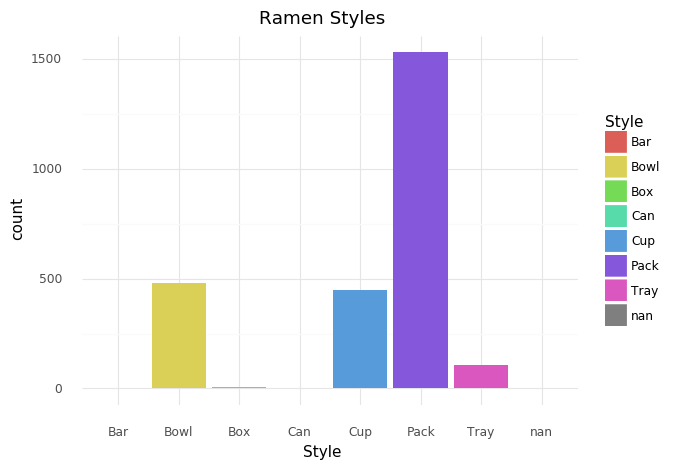

<ggplot: (305335030)>

In [11]:
(ggplot(ramen, aes(x = "Style")) + geom_bar(aes(fill = "Style")) + ggtitle("Ramen Styles") + theme_minimal())

### Look at ramen from japan and USA separately

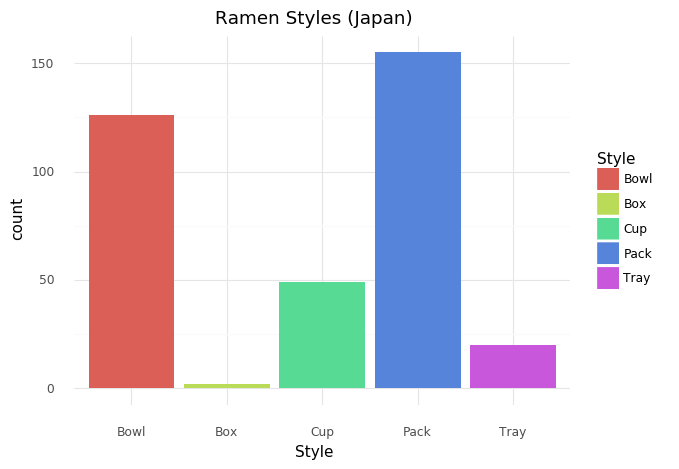

<ggplot: (306076364)>

In [21]:
(ggplot(ramen.loc[ramen["Country"] == "Japan"], aes(x = "Style")) +
 geom_bar(aes(fill = "Style")) + ggtitle("Ramen Styles (Japan)") + theme_minimal())

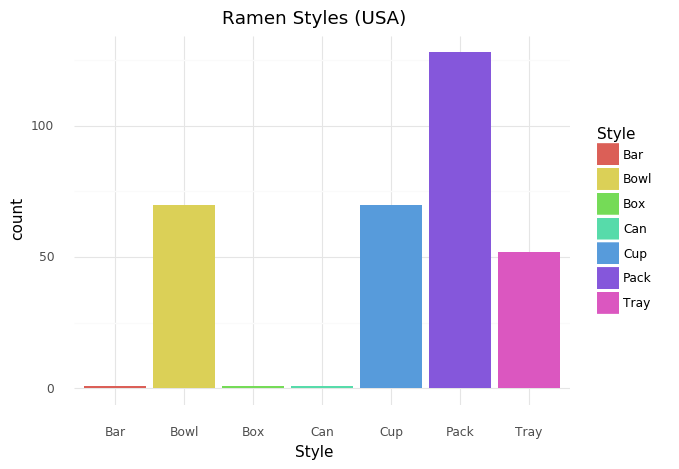

<ggplot: (-9223372036549010060)>

In [22]:
(ggplot(ramen.loc[ramen["Country"] == "USA"], aes(x = "Style")) +
 geom_bar(aes(fill = "Style")) + ggtitle("Ramen Styles (USA)") + theme_minimal())

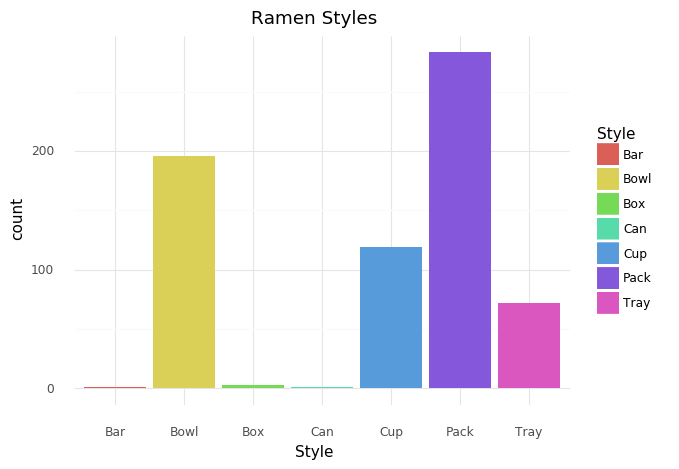

<ggplot: (305889449)>

In [18]:
ramenBool = (ramen["Country"] == "Japan") | (ramen["Country"] == "USA")
JUramen = ramen.loc[ramenBool]
(ggplot(JUramen, aes(x = "Style")) + geom_bar(aes(fill = "Style")) +
 ggtitle("Ramen Styles") + theme_minimal())

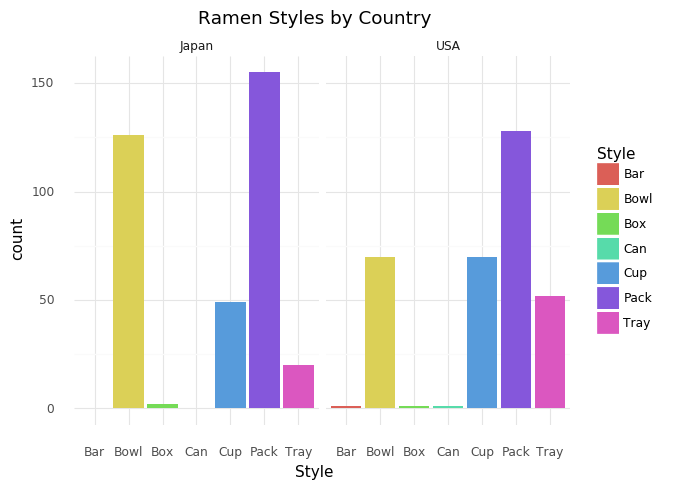

<ggplot: (-9223372036552369927)>

In [24]:
(ggplot(JUramen, aes(x = "Style")) + geom_bar(aes(fill = "Style")) +
 ggtitle("Ramen Styles by Country") + theme_minimal() +
facet_wrap("Country"))

## Custom Labels

In [25]:
# From https://www.kaggle.com/neuromusic/avocado-prices
avo = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/avocado.csv")

In [26]:
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
avo["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

### Plot sales of 4046 by average price

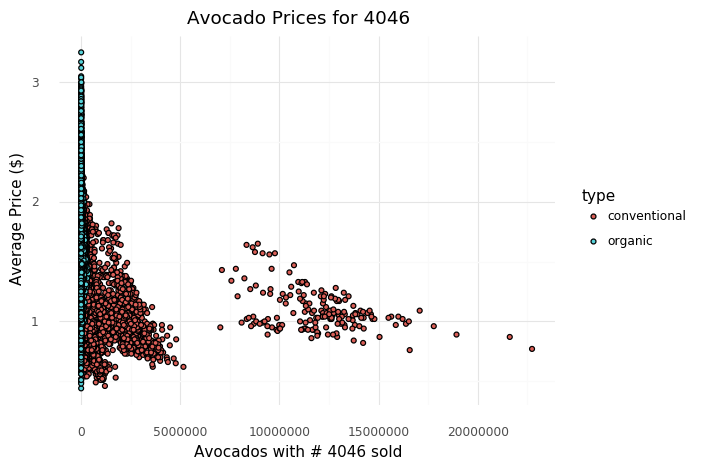

<ggplot: (-9223372036551653821)>

In [32]:
(ggplot(avo, aes(x = "4046", y = "AveragePrice")) +
geom_point(aes(fill = "type")) + 
theme_minimal() + 
labs(title = "Avocado Prices for 4046",
     x = "Avocados with # 4046 sold", y = "Average Price ($)"))

What could we do to make this better?

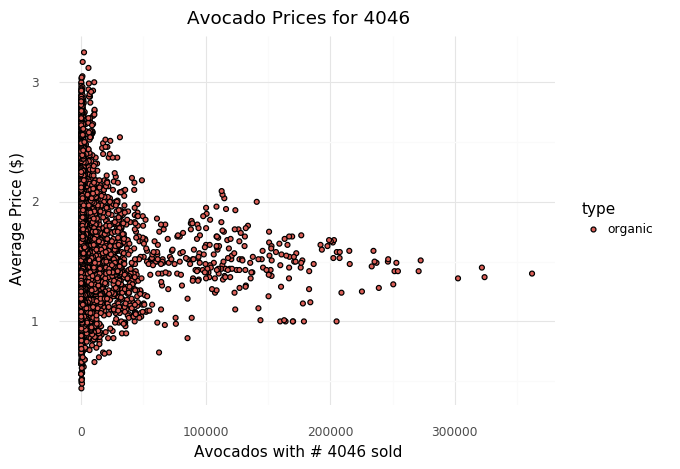

<ggplot: (303124779)>

In [33]:
(ggplot(avo.loc[avo["type"] == "organic"], aes(x = "4046", y = "AveragePrice")) +
geom_point(aes(fill = "type")) + 
theme_minimal() + 
labs(title = "Avocado Prices for 4046",
     x = "Avocados with # 4046 sold", y = "Average Price ($)"))

# Any patterns or trends that you notice?

### Plot boxlotp of Average Price by type in  2015, 2016, 2017 and 2018 separately

In [35]:
avo["year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

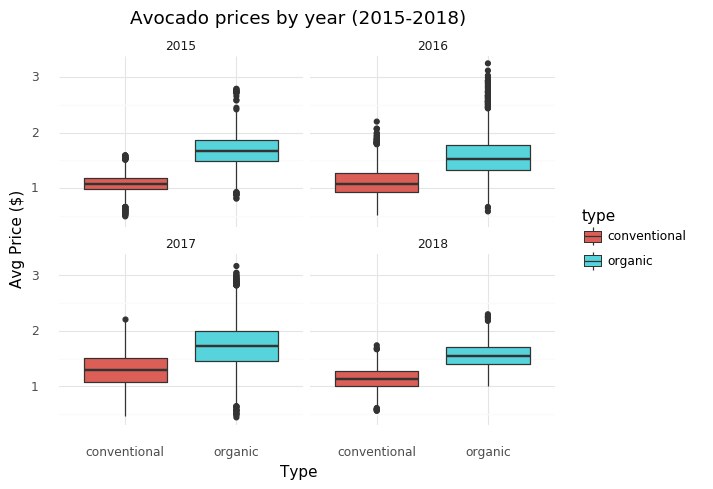

<ggplot: (306204017)>

In [42]:
(ggplot(avo, aes( "type","AveragePrice")) +
geom_boxplot(aes(fill = "type")) +
theme_minimal()+
labs(title = "Avocado prices by year (2015-2018)",
     x = "Type",
    y = "Avg Price ($)") +
facet_wrap("year"))

### Questions
* which year had the most variability in prices?
* which year had the highest prices for conventional? organic?

### Is the number of small and large bags sold correlated? Show points and line (HINT: use geom_smooth(method = "lm"))

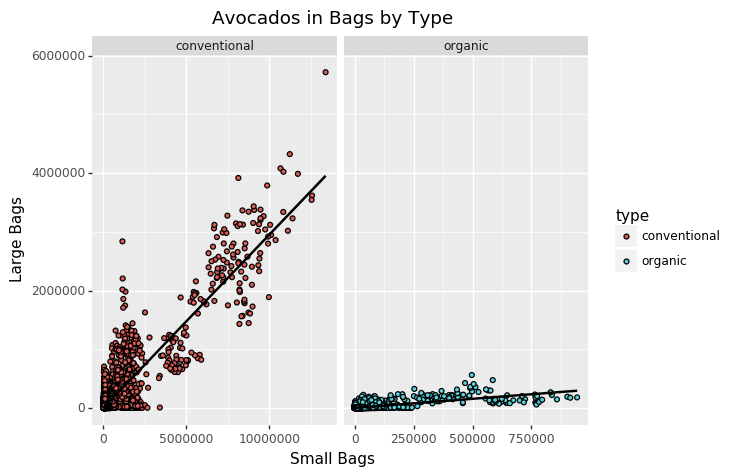

<ggplot: (307352482)>

In [49]:
(ggplot(avo, aes(x = "Small Bags", y = "Large Bags")) +
geom_point(aes(fill = "type")) +
geom_smooth(method = "lm") + 
facet_wrap("type", scales = "free_x") + 
ggtitle("Avocados in Bags by Type"))

#scales = free_y

### Look at prices across different regions

In [56]:
avo["region"].value_counts()
avo_subBool = (avo["region"].isin(["SanFrancisco", "Denver", "Boise", "Orland"]))
avo_sub = avo.loc[avo_subBool]
avo_sub.shape

(1014, 14)

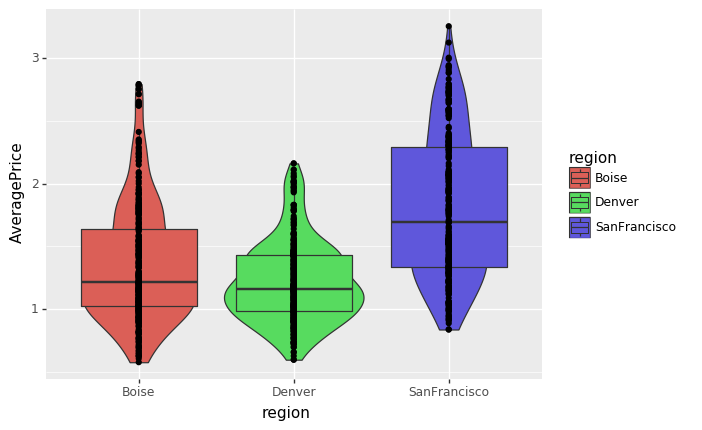

<ggplot: (-9223372036548697852)>

In [61]:
(ggplot(avo_sub, aes(x = "region", y = "AveragePrice")) + 
geom_violin(aes(fill = "region")) +
geom_boxplot(aes(fill = "region")) + 
geom_point())

In [62]:
# From https://www.kaggle.com/ronitf/heart-disease-uci

heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Graph chest pain type (cp) by sex

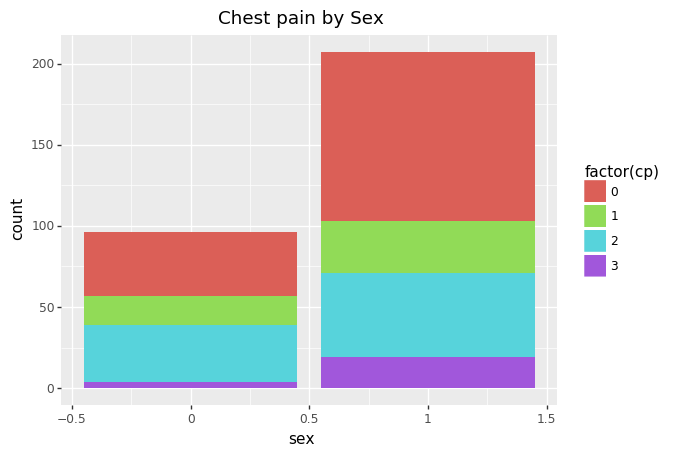

<ggplot: (-9223372036549207829)>

In [66]:
(ggplot(heart, aes(x = "sex")) + 
geom_bar(aes(fill = "factor(cp)")) + 
ggtitle("Chest pain by Sex")) #factor turns 0-3 into categories